2
[121, 52]
32.919857508136865
32.919857508136865
2


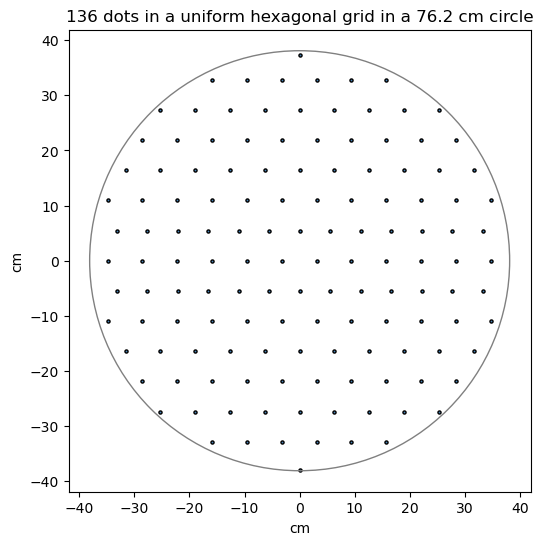

Average spacing between points: 34.65 cm
Minimum spacing between points: 5.41 cm
2


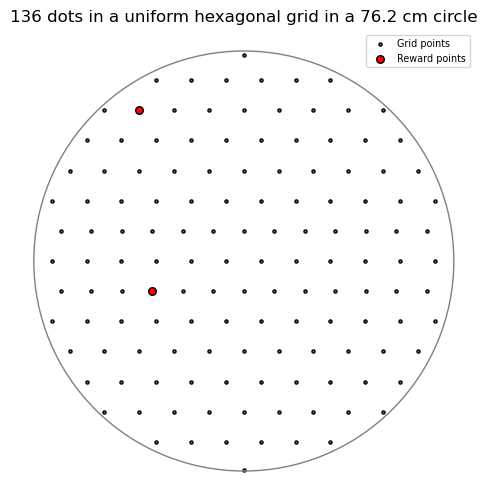

In [1]:
# Online Python compiler (interpreter) to run Python online.
# Write Python 3 code in this online editor and run it.
# Get started with interactive Python!
# Supports Python Modules: builtins, math,pandas, scipy 
# matplotlib.pyplot, numpy, operator, processing, pygal, random, 
# re, string, time, turtle, urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from random import sample
from random import seed

def uniform_hex_grid(n_points, diameter_cm, percentage):
    """Generate x, y coordinates for a uniform hexagonal grid within a circle.

    Parameters
    ----------
    n_points : int
        Number of points to generate.
    diameter_cm : float
        Diameter of the circle in centimeters.

    Returns
    -------
    x, y : np.ndarray
        Arrays of x and y coordinates (in cm).
    """
    R = diameter_cm / 2  # radius in cm

    # Let's use a simpler estimate for spacing based on the average area per point.
    # Area per point = Area of circle / Number of points = pi * R^2 / n_points
    # For hexagonal packing, area per point = side_length^2 * sqrt(3)
    # spacing^2 * sqrt(3) = pi * R^2 / n_points
    spacing = np.sqrt( (np.pi * R**2) / (n_points * np.sqrt(3)) )


    # Generate points in a grid that's slightly larger than the circle's bounding box
    # We need enough points to cover the area.

    # Approximate number of points along the horizontal and vertical axis: ceil(2R / spacing) + 1
    n_h = int(np.ceil(2 * R / spacing)) + 2
    n_v = int(np.ceil(2 * R / spacing)) + 2

    x_grid = np.linspace(-R - spacing, R + spacing, n_h)
    y_grid = np.linspace(-R - spacing, R + spacing, n_v)

    # Create the points for the hexagonal grid
    x_coords = []
    y_coords = []

    x_first = x_grid[len(x_grid) // 2]
    y_first = y_grid[1]
    x_coords.append(x_first)
    y_coords.append(y_first)

    for i in range(n_v):
        if i == 6 or i == 8:
            n_h += 2
            x_grid = np.linspace(-R - spacing, R + spacing, n_h)
        else:
            n_h = int(np.ceil(2 * R / spacing)) + 2
            x_grid = np.linspace(-R - spacing, R + spacing, n_h)
        for j in range(n_h):
            x = x_grid[j]
            y = y_grid[i]
            if i % 2 == 1: # Odd row, shift x
                x += spacing / 2
            y *= (np.sqrt(3) / 2) # Adjust vertical spacing

            # Add to list if within the circle
            if x**2 + y**2 <= R**2:
                x_coords.append(x)
                y_coords.append(y)

    #last dot made
    x_last = x_grid[len(x_grid) // 2]
    y_last = y_first + diameter_cm - 1
    x_coords.append(x_last)
    y_coords.append(y_last)

    #randomly selects reward ports

    population = list(range(n_dots_reward))  # Zero-indexed range
    k = int(n_dots_reward * percentage)  # Number of reward points
    print(k)
    randarray = sample(population, k=k)  # Random selection of indices    
    print(randarray)

    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    x_reward_coords = x_coords[randarray]
    y_reward_coords = y_coords[randarray]

    return (x_coords, y_coords,x_reward_coords, y_reward_coords)


# Parameters
n_dots = 70
n_dots_reward = 136
diameter = 76.2  # in cm
percentage = .015

# Generate dot positions using the uniform hexagonal grid function
x, y, x_reward_coords, y_reward_coords = uniform_hex_grid(n_dots, diameter, percentage)
reward_dist = math.sqrt((x_reward_coords[1] - x_reward_coords[0])**2 + (y_reward_coords[1] - y_reward_coords[0])**2)
print(reward_dist)

#Exclusion criteria for reward port distances
while reward_dist < 30:    #Find new ports if reward ports two close together
    x, y, x_reward_coords, y_reward_coords = uniform_hex_grid(n_dots, diameter, percentage)
    reward_dist = math.sqrt((x_reward_coords[1] - x_reward_coords[0])**2 + (y_reward_coords[1] - y_reward_coords[0])**2)
    #print("Gonna try again")
    #print(reward_dist)

print(reward_dist)
print(len(x_reward_coords))

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=5, color='steelblue', edgecolor='black')
circle = plt.Circle((0,0), diameter / 2, color='gray', fill=False, linewidth=1)
plt.gca().add_patch(circle)

plt.gca().set_aspect('equal')
plt.title(f'{len(x)} dots in a uniform hexagonal grid in a {diameter} cm circle')
plt.xlabel('cm')
plt.ylabel('cm')
plt.grid(False)

plt.show()


# Calculate the pairwise distances between all points
distances = pdist(np.vstack((x, y)).T)

# Calculate the average of these distances
average_spacing = np.mean(distances)

print(f"Average spacing between points: {average_spacing:.2f} cm")
if len(distances) > 0:
    print(f"Minimum spacing between points: {min(distances):.2f} cm")
else:
    print("No distances calculated as there are 1 or fewer points.")
    

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=5, color='steelblue', edgecolor='black', label='Grid points')
plt.scatter(x_reward_coords, y_reward_coords, s=30, color='red', edgecolor='black', label='Reward points')  # Highlight reward points
circle = plt.Circle((0, 0), diameter / 2, color='gray', fill=False, linewidth=1)
plt.gca().add_patch(circle)
plt.gca().set_aspect('equal')
plt.title(f'{len(x)} dots in a uniform hexagonal grid in a {diameter} cm circle')
plt.axis("off")
plt.legend(fontsize = 'x-small')
plt.grid(False)

print(len(x_reward_coords))
plt.show()
